<a href="https://colab.research.google.com/github/feist000/Study/blob/master/Visualization/official_seaborn_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 그래프를 만들 때,고려해야 할 것들
1. 종속 변수 설정
2. 독립 변수 설정
3. 시각화는 데이터의 비교를 위해서 만들어지는 것 
4. 아름답고 미니멀하게 답정너

# <1> 통계적 관계 시각화



(1) 통계적 관계 시각화 
- 통계분석이란? 
>  데이터 세트의 변수가 어떻게 서로 연관되어 있는지, 이러한 관계가 다른 변수에 어떻게 의존하는지를 이해하는 과정.



- 통계분석과 시각화의 관계
> 데이터가 제대로 시각화 되면 관계를 나타내는 추세와 패턴을 한눈에 파악하기 좋기 때문에 통계분석 시 시각화가 필수적 사용됨.



***모든 시작 전 필수적으로 입력해야 하는 import 묶음을 실행시키고  START***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


***그러면 시각화를 진행 할 데이터를 불러와보자.***

In [ ]:
from google.colab import drive

ROOT = "/content/drive"     
print(ROOT)                 
drive.mount(ROOT)

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd drive/'My Drive'/'Colab Notebooks/house_price_data'

/content/drive/My Drive/Colab Notebooks/house_price_data


In [ ]:
%ls

sample_submission.csv  test.csv  train.csv


In [ ]:
test = pd.read_csv('test.csv') ; test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [ ]:
sample_submission=pd.read_csv('sample_submission.csv') ; sample_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


***구글 드라이브를 통해 test.csv 파일과 sample_submission.csv 파일을 불러왔다. 이 파일들을 토대로 시각화를 진행해보자. ***


(추가) 생각보다 데이터로 시각화가 제대로 진행되지 않아서, 일단은 seaborn에 기존으로 있는 tips 데이터를 이용해 진행했다. 다른 데이터도 추후 응용 예정.

# 1.1 relplot() 산점도


> 점들을 이용해 두 변수의 공동 분포를 묘사한다. 여기서 각 점은 데이터 세트를 의미.



In [ ]:
tips = sns.load_dataset("tips") ; tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


**산점도 그래프 요소**
* x= x축 값 
* y= y축 값
* hue = 그래프 옆에 위치하는 data의 이름, optional
* palette = 점들의 색상을 정의해줄 수 있음.

[더 자세한 설명은 이 링크를 보세요.](https://seaborn.pydata.org/generated/seaborn.relplot.html)

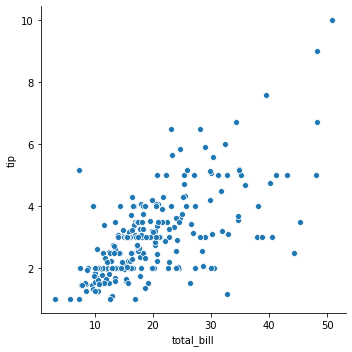

In [ ]:
# 기본형

sns.relplot(x='total_bill', y='tip', data = tips)

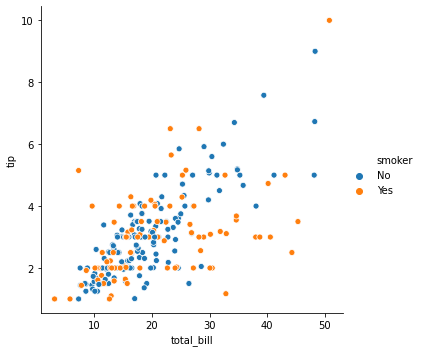

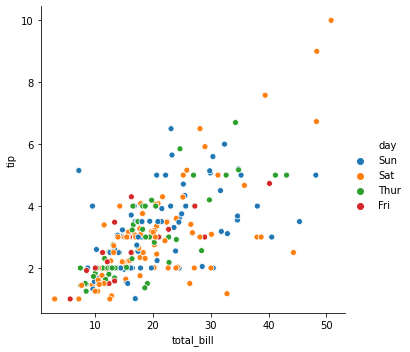

In [ ]:
# hue 설정 : 옆에 있는 optional 설명 설정  

sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)
sns.relplot(x="total_bill", y="tip", hue="day",data=tips)

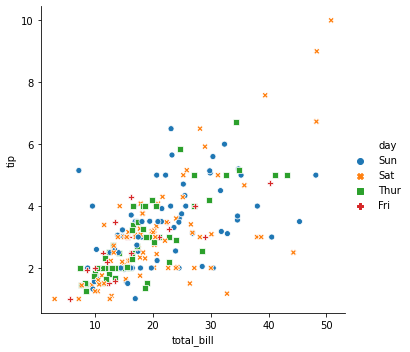

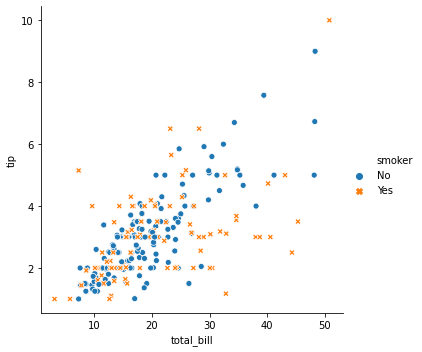

In [ ]:
# style 설정 : 각 점들의 모양 설정

sns.relplot(x="total_bill", y="tip", hue="day",style = 'day', data=tips)
sns.relplot(x='total_bill', y='tip', hue ='smoker', style='smoker', data=tips)

***인간의 눈은 모양보다 색에 훨씬 더 민감하게 반응한다. 때문에 확실한 시각화를 원한다면 모양보다는 색에 차이점을 두는 것이 좋다.***

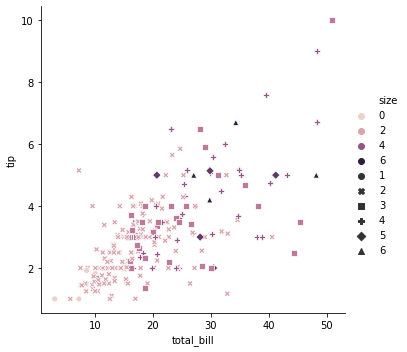

In [ ]:
sns.relplot(x='total_bill', y='tip', data=tips, hue='size', style='size')

해석 : seaborn에서 tips라는 데이터를 이용해 relplot 모양의 시각화를 만들었다. x축은 total_bill, y축은 tip을 설정, 
옆에 설정한 hue 값은 size로 설정, size의 각 점들을 카테고리에 따라 다르게 설정해주었다. 

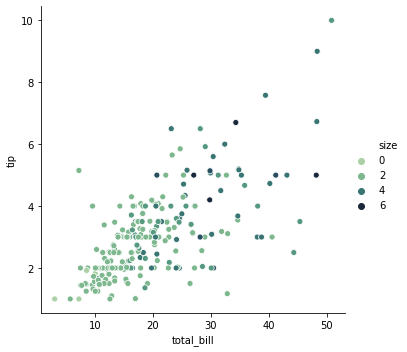

In [ ]:
# Palette : 점들의 컬러 설정 

sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips);

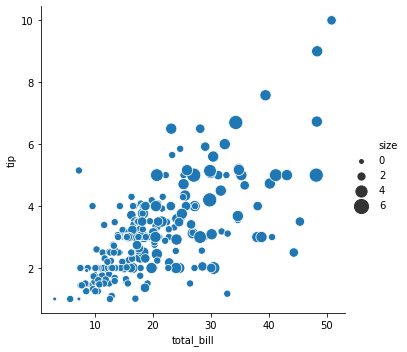

In [ ]:
# sizes : 점들의 크기 범위 설정 

sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips)

#1.2 lineplot() 선 그림 
> 한 변수의 변화를 시간 함수, 유사한 연속 변수로 이해하려고 할 때가 있다. 
이 때, 선으로 이루어진 그래프를 그리면 이해하기 용이하다. 



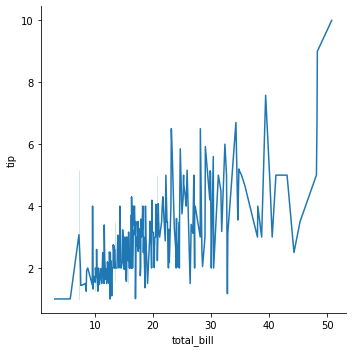

In [ ]:
# kind : 그래프 스타일을 설정 

g = sns.relplot(x='total_bill', y='tip', data = tips, kind='line')

*조금 더 복잡한 데이터를 이용해서 다양한 lineplot()을 그려보자.*

In [ ]:
import seaborn as sns 
fmri = sns.load_dataset("fmri")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


*여러가지 측정 값을 갖는 데이터 세트는 불확실한 집계를 표현할 수 있다. 100% 일치는 아니더라도, 95%까지 끌어올린 신뢰도를 바탕으로 각 값에서 여러 측정 값을 집계할 수 있는 시스템인 것이다. 그래프를 그리면 옅은 푸른 색으로 하이라이트가 굵게 들어간 부분이 그 것이다.*

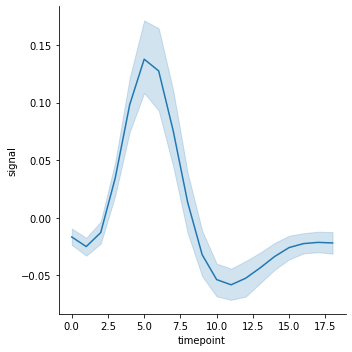

In [ ]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)

*'이 범위까지를 허용한다.' 라는 의미로 생각하면 될 것 같다. ci 구간은 대규모 데이터 세트의 경우, 오랜 시간이 소요될 수 있으므로 필요에 따라 비활성화 시켜주는 게 좋다. ex) ci = None*

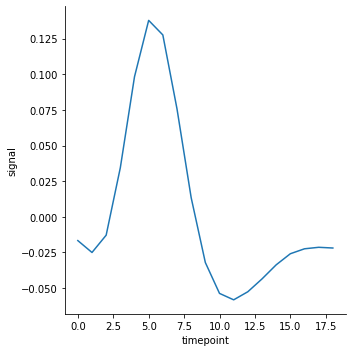

In [ ]:
#  ci = 신뢰구간 (Confidence intervals)

sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri)

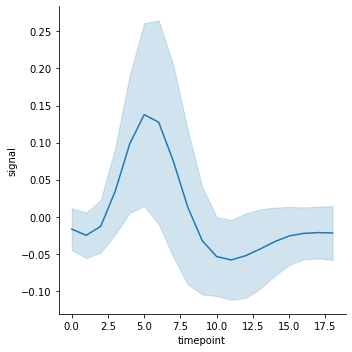

In [ ]:
# ci = sd 
# 예외) ci 대신 표준 편차를 이용해서 각 시점에서 분포의 산포도를 표현할 수도 있다.

sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri)

# 1.3 Semantic Mapping 그래프

*lineplot() 함수는 scatterplot() 함수랑 같은 유연성을 갖는다. 유연성을 갖는다는 의미는 plot 요소의 컬러, 크기 및 스타일들을 수정하여 최대 3개의 추가 변수를 표시할 수 있는 등 다양한 변주가 가능하다는 뜻으로 해석할 수 있다. *

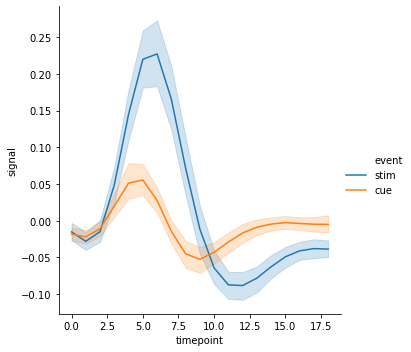

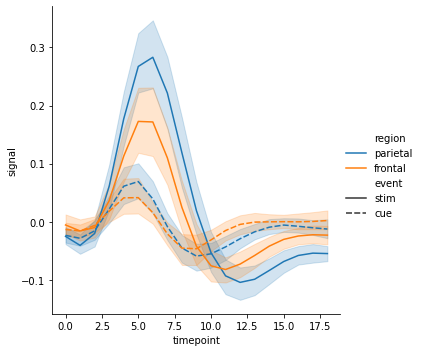

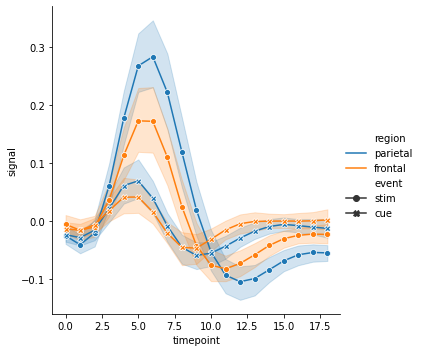

In [ ]:
# 변수 2개 설정한 기본 그래프
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri)

# style 추가 설정 
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri)

# dashes = --- 표시 , markers = 구간 마다 점 찍기 추가 설정 
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri)

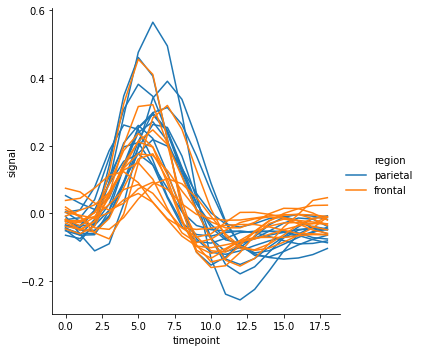

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"))

다른 방식으로도 응용 그래프를 그려봅시다.
1. dots data를 불러온다.
2. hue 지정, 원하는 style 추가 지정

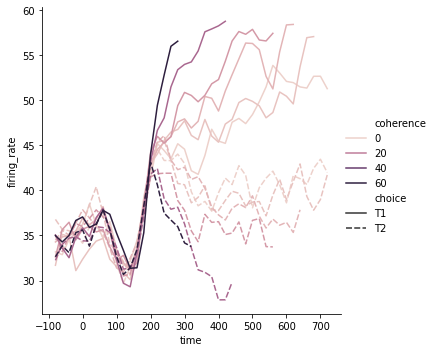

In [ ]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots)

*hue 변수가 숫자이지만, 선형 색상 척도로 제대로 표현되지 않을 경우도 있다. hue 변수의 척도가 너무 클 때다. 이럴 때는 특정한 컬러를 설정해주는 것이 좋다. *

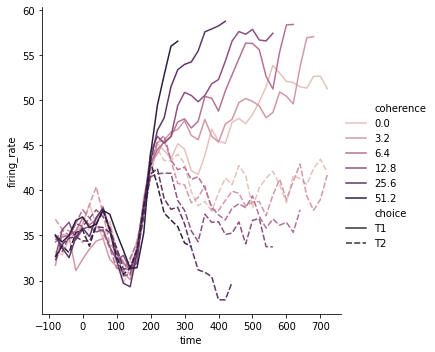

In [ ]:
# 바로 이렇게!

palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            palette=palette,
            kind="line", data=dots)

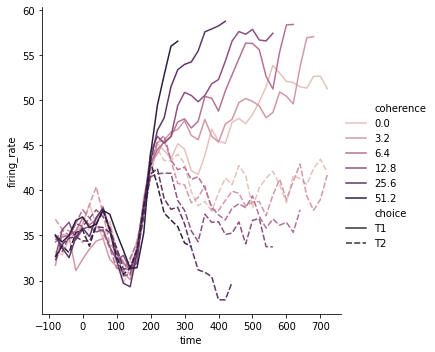

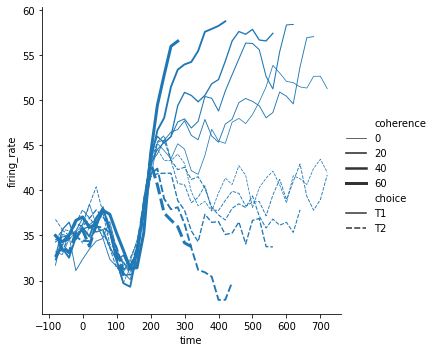

In [ ]:
# size로 선의 너비를 번경할 수 있다.

palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            palette=palette,
            kind="line", data=dots)

sns.relplot(x="time", y="firing_rate",
            size="coherence", style="choice",
            kind="line", data=dots);

# 1.4 날짜 데이터 그래프 

선 그래프는 실제 날짜 및 시간과 관련된 데이터를 시각화 하는데 자주 사용된다. 이 함수는 기존 형식의 데이터를 matplotlib에 함수에 전달시켜 matplotlib의 눈금 레이블 형식 지정 기능을 활용할 수 있다는 장점이 있다. 

- 더 자세한 사항은 matplotlib manual 참조.

In [ ]:
import pandas as pd
import numpy as np

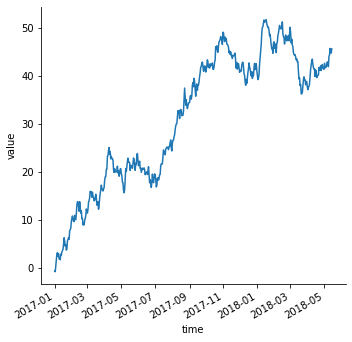

In [ ]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500), # 날짜, 기간 설정
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

*facet이 있는 여러 관계 보여주기 *

In [ ]:
tips = sns.load_dataset("tips") ; tips # 을 이용해서 시작!

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


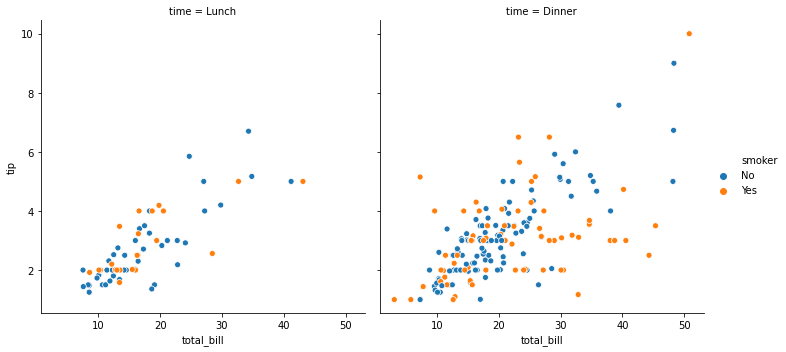

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips)

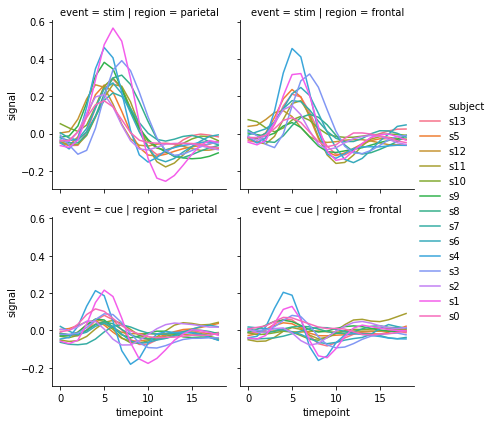

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri)

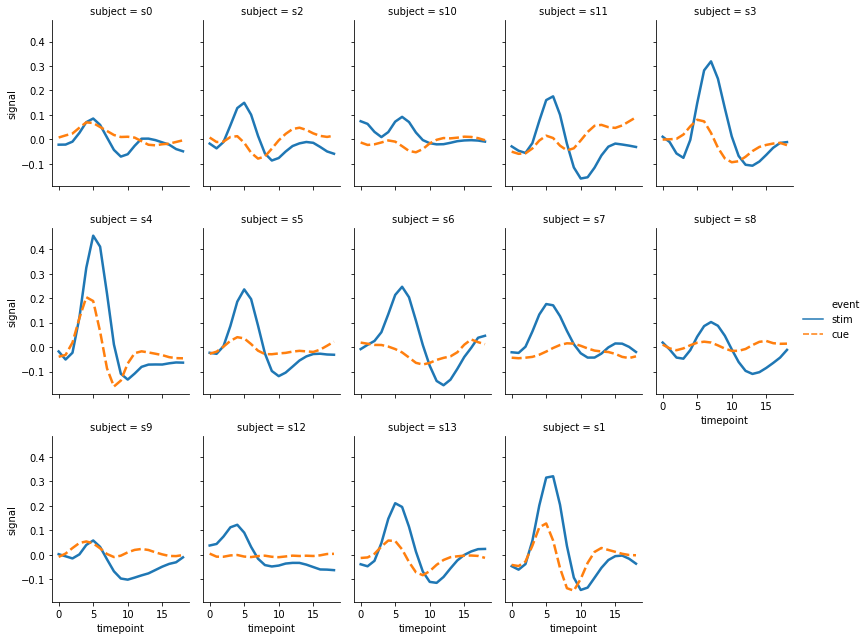

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"))

이런 방식을 격자 plot 또는 'small-multiples'라고 하는데 시각적으로 한눈에 알아보기 매우 용이하다는 장점을 가지고 있다. 

# <2> 범주형 데이터 Plotting


* 여기서부터 계속 해보자. 마지막까지!